In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2008-2022-batting-scorecards/batting_stats.csv


In [2]:
df = pd.read_csv('/kaggle/input/ipl-2008-2022-batting-scorecards/batting_stats.csv')
df.head()

,season,match,result,team,innings,batter_name,out_style,runs,balls,fours,sixes,strike rate
0,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians Innings,1st innings,Rohit Sharma,not out,98,65.0,12.0,4.0,150.77
1,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians Innings,1st innings,Aaron Finch,c Umesh b M Morkel,5,5.0,1.0,0.0,100.00
2,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings Innings,1st innings,Faf du Plessis,run out (A Rayudu),3,2.0,0.0,0.0,150.00
3,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings Innings,1st innings,Murali Vijay,c H Singh b J Franklin,10,17.0,1.0,0.0,58.82
4,Indian Premier League 2014,"MUMBAI INDIANS vs KOLKATA KNIGHT RIDERS, 1st M...",Kolkata Knight Riders won by 41 runs,Kolkata Knight Riders Innings,1st innings,Gautam Gambhir,b Malinga,0,8.0,0.0,0.0,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15940 entries, 0 to 15939
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       15940 non-null  object 
 1   match        15940 non-null  object 
 2   result       15940 non-null  object 
 3   team         15940 non-null  object 
 4   innings      15940 non-null  object 
 5   batter_name  14539 non-null  object 
 6   out_style    14539 non-null  object 
 7   runs         15940 non-null  object 
 8   balls        14539 non-null  float64
 9   fours        14539 non-null  float64
 10  sixes        14539 non-null  float64
 11  strike rate  14539 non-null  float64
dtypes: float64(4), object(8)
memory usage: 1.5+ MB


In [4]:
df.dropna(inplace=True)
df.shape

(14539, 12)

In [5]:
df.columns

Index(['season', 'match', 'result', 'team', 'innings', 'batter_name',
       'out_style', 'runs', 'balls', 'fours', 'sixes', 'strike rate'],
      dtype='object')

In [6]:
df.season.value_counts()

Indian Premier League 2013     1184
Indian Premier League 2022     1176
Indian Premier League 2012     1123
Indian Premier League 2011     1075
Indian Premier League 2010      938
Indian Premier League 2021      934
Indian Premier League, 2018     933
Indian Premier League, 2017     914
Indian Premier League 2019      904
Indian Premier League 2009      903
Indian Premier League 2015      900
Indian Premier League 2008      895
Indian Premier League 2014      893
Indian Premier League, 2016     884
Indian Premier League 2020      883
Name: season, dtype: int64

In [7]:
for i in df.groupby(['season']):
    print(i[0],len(i[1]['match'].unique()))

Indian Premier League 2008 58
Indian Premier League 2009 57
Indian Premier League 2010 60
Indian Premier League 2011 73
Indian Premier League 2012 74
Indian Premier League 2013 76
Indian Premier League 2014 60
Indian Premier League 2015 59
Indian Premier League 2019 60
Indian Premier League 2020 60
Indian Premier League 2021 60
Indian Premier League 2022 74
Indian Premier League, 2016 60
Indian Premier League, 2017 59
Indian Premier League, 2018 60


In [8]:
df.team.unique()

array(['Mumbai Indians Innings', 'Chennai Super Kings Innings',
       'Kolkata Knight Riders Innings',
       'Royal Challengers Bangalore Innings',
       'Sunrisers Hyderabad Innings', 'Kings XI Punjab Innings',
       'Delhi Daredevils Innings', 'Rajasthan Royals Innings',
       'Deccan Chargers Innings', 'Delhi Capitals Innings',
       'Rising Pune Supergiant Innings', 'Gujarat Lions Innings',
       'Rising Pune Supergiants Innings', 'Punjab Kings Innings',
       'Gujarat Titans Innings', 'Lucknow Super Giants Innings',
       'Kochi Tuskers Kerala Innings', 'Pune Warriors Innings'],
      dtype=object)

In [9]:
df['team'] = df.team.apply(lambda x:x[:-8])

In [10]:
df.team.unique()

array(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rajasthan Royals',
       'Deccan Chargers', 'Delhi Capitals', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [11]:
rep = {'Rising Pune Supergiant':'Rising Pune Supergiants',\
       'Kings XI Punjab' : 'Punjab Kings',\
       'Delhi Daredevils' : 'Delhi Capitals'}
df.team.replace(rep, inplace=True)

In [12]:
df.team.unique()

array(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Rajasthan Royals',
       'Deccan Chargers', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kochi Tuskers Kerala',
       'Pune Warriors'], dtype=object)

In [13]:
df.head()

,season,match,result,team,innings,batter_name,out_style,runs,balls,fours,sixes,strike rate
0,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Rohit Sharma,not out,98,65.0,12.0,4.0,150.77
1,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Aaron Finch,c Umesh b M Morkel,5,5.0,1.0,0.0,100.00
2,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Faf du Plessis,run out (A Rayudu),3,2.0,0.0,0.0,150.00
3,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Murali Vijay,c H Singh b J Franklin,10,17.0,1.0,0.0,58.82
4,Indian Premier League 2014,"MUMBAI INDIANS vs KOLKATA KNIGHT RIDERS, 1st M...",Kolkata Knight Riders won by 41 runs,Kolkata Knight Riders,1st innings,Gautam Gambhir,b Malinga,0,8.0,0.0,0.0,0.00


In [14]:
df[df.select_dtypes('object').columns] = df.select_dtypes('object').apply(lambda x:x.str.strip(),axis=1)

In [15]:
df.head()

,season,match,result,team,innings,batter_name,out_style,runs,balls,fours,sixes,strike rate
0,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Rohit Sharma,not out,98,65.0,12.0,4.0,150.77
1,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Aaron Finch,c Umesh b M Morkel,5,5.0,1.0,0.0,100.00
2,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Faf du Plessis,run out (A Rayudu),3,2.0,0.0,0.0,150.00
3,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Murali Vijay,c H Singh b J Franklin,10,17.0,1.0,0.0,58.82
4,Indian Premier League 2014,"MUMBAI INDIANS vs KOLKATA KNIGHT RIDERS, 1st M...",Kolkata Knight Riders won by 41 runs,Kolkata Knight Riders,1st innings,Gautam Gambhir,b Malinga,0,8.0,0.0,0.0,0.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14539 entries, 0 to 15939
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       14539 non-null  object 
 1   match        14539 non-null  object 
 2   result       14539 non-null  object 
 3   team         14539 non-null  object 
 4   innings      14539 non-null  object 
 5   batter_name  14539 non-null  object 
 6   out_style    14539 non-null  object 
 7   runs         14539 non-null  object 
 8   balls        14539 non-null  float64
 9   fours        14539 non-null  float64
 10  sixes        14539 non-null  float64
 11  strike rate  14539 non-null  float64
dtypes: float64(4), object(8)
memory usage: 1.4+ MB


In [17]:
df['runs'] = df.runs.astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14539 entries, 0 to 15939
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       14539 non-null  object 
 1   match        14539 non-null  object 
 2   result       14539 non-null  object 
 3   team         14539 non-null  object 
 4   innings      14539 non-null  object 
 5   batter_name  14539 non-null  object 
 6   out_style    14539 non-null  object 
 7   runs         14539 non-null  int64  
 8   balls        14539 non-null  float64
 9   fours        14539 non-null  float64
 10  sixes        14539 non-null  float64
 11  strike rate  14539 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [19]:
for i in df.columns[:7]:
    df[i] = pd.Categorical(df[i])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14539 entries, 0 to 15939
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       14539 non-null  category
 1   match        14539 non-null  category
 2   result       14539 non-null  category
 3   team         14539 non-null  category
 4   innings      14539 non-null  category
 5   batter_name  14539 non-null  category
 6   out_style    14539 non-null  category
 7   runs         14539 non-null  int64   
 8   balls        14539 non-null  float64 
 9   fours        14539 non-null  float64 
 10  sixes        14539 non-null  float64 
 11  strike rate  14539 non-null  float64 
dtypes: category(7), float64(4), int64(1)
memory usage: 1.1 MB


In [21]:
#most number of innings played
df.batter_name.unique()

['Rohit Sharma', 'Aaron Finch', 'Faf du Plessis', 'Murali Vijay', 'Gautam Gambhir', ..., 'Uday Kaul', 'Ben Hilfenhaus', 'Doddapaneni Kalyankrishna', 'Musavir Khote', 'Darren Lehmann']
Length: 860
Categories (860, object): ['A Mishra', 'A Rahane', 'A Rahane (c)', 'A Russell', ..., 'de Villiers (wk)', 'du Plessis', 'du Plessis (c)', 'van der Dussen']

In [22]:
df.batter_name[-50:]

15890              Pragyan Ojha
15891            Abhishek Nayar
15892             Shaun Pollock
15893                Pinal Shah
15894             Robin Uthappa
15895         Sanath Jayasuriya
15896          Dominic Thornely
15897           Ravindra Jadeja
15898            Darren Lehmann
15899                Karan Goel
15900              Simon Katich
15901              Yuvraj Singh
15902          Kumar Sangakkara
15903               James Hopes
15904                  RP Singh
15905             Chaminda Vaas
15906               Arjun Yadav
15907             Sanjay Bangar
15908              Scott Styris
15909              Rohit Sharma
15910               Luke Ronchi
15911         Balachandra Akhil
15912              Mark Boucher
15913              Shane Watson
15914             Mohammad Kaif
15915              Yusuf Pathan
15916             Taruwar Kohli
15917         Siddharth Trivedi
15918               Shane Warne
15919           Dinesh Salunkhe
15920              Mahesh Rawat
15921   

In [23]:
#removing the attributes 
df['batter_name'] = df.batter_name.str.replace(r'\s\([\s\w\W\S]+\)','',regex=True)

In [24]:
batsmen = df.groupby('batter_name')['innings'].apply(lambda x:x.shape[0])

In [25]:
batsmen = batsmen.reset_index()

In [26]:
batsmen.batter_name.unique()

array(['A Mishra', 'A Rahane', 'A Russell', 'AB de Villiers',
       'Aakash Chopra', 'Aaron', 'Aaron Finch', 'Abdul Samad',
       'Abdur Razzak', 'Abhijeet Tomar', 'Abhimanyu Mithun',
       'Abhinav Manohar', 'Abhinav Mukund', 'Abhishek Jhunjhunwala',
       'Abhishek Nayar', 'Abhishek Raut', 'Abhishek Sharma', 'Abu Nechim',
       'Adam Gilchrist', 'Adam Milne', 'Adam Voges', 'Adam Zampa',
       'Aditya Dole', 'Aditya Tare', 'Adrian Barath', 'Aiden Blizzard',
       'Aiden Markram', 'Ajantha Mendis', 'Ajinkya Rahane',
       'Ajit Agarkar', 'Ajit Chandila', 'Akash Deep', 'Akshath Reddy',
       'Akshdeep Nath', 'Albie Morkel', 'Alex Carey', 'Alex Hales',
       'Alfonso Thomas', 'Ali Murtaza', 'Alzarri Joseph',
       'Aman Hakim Khan', 'Ambati Rayudu', 'Amit Mishra', 'Amit Paunikar',
       'Amit Singh', 'Amit Uniyal', 'Amla', 'Andre Nel', 'Andre Russell',
       'Andrew Flintoff', 'Andrew McDonald', 'Andrew Symonds',
       'Andrew Tye', 'Angelo Mathews', 'Aniket Choudhary', 'An

In [27]:
batsmen.columns

Index(['batter_name', 'innings'], dtype='object')

In [28]:
batsmen.sort_values(by='innings',ascending=False).iloc[:20,:]

,batter_name,innings
559,Rohit Sharma,176
670,Suresh Raina,174
370,MS Dhoni,167
733,Virat Kohli,167
554,Robin Uthappa,166
539,Ravindra Jadeja,161
193,Dinesh Karthik,160
625,Shikhar Dhawan,154
221,Gautam Gambhir,145
380,Manish Pandey,144


In [29]:
df.columns

Index(['season', 'match', 'result', 'team', 'innings', 'batter_name',
       'out_style', 'runs', 'balls', 'fours', 'sixes', 'strike rate'],
      dtype='object')

In [30]:
df.innings.value_counts().index.values

['1st innings', '2nd innings']
Categories (2, object): ['1st innings', '2nd innings']

In [31]:
df.out_style.value_counts()

not out                           3409
b Narine                            35
b Malinga                           33
b Chahal                            33
b Bumrah                            32
                                  ... 
c R Jadeja b S Jakati                1
c R Levi b K Pollard                 1
c R Levi b P Ojha                    1
c R McLaren b I Abdulla              1
st de Villiers b Syed Mohammad       1
Name: out_style, Length: 6143, dtype: int64

In [32]:
def get_out(x):
    if x.startswith('c '):
        return "caught"
    elif x.startswith('b '):
        return "bowled"
    elif x.startswith('st '):
        return "stumped"
    elif x.startswith('hit '):
        return "hit wicket"
    elif x.startswith('run '):
        return "runout"
    elif x.startswith('lbw '):
        return "lbw"
    elif x.startswith('not '):
        return "notout"
    else:
        return 'hurt out'

In [33]:
style = df.out_style.apply(get_out)

In [34]:
style.value_counts()

caught        7151
notout        3409
bowled        1936
runout        1000
lbw            682
stumped        325
hurt out        22
hit wicket      14
Name: out_style, dtype: int64

In [35]:
df.out_style

0                       not out
1            c Umesh b M Morkel
2            run out (A Rayudu)
3        c H Singh b J Franklin
4                     b Malinga
                  ...          
15935          c Symonds b Ojha
15936                   not out
15937                    b Ojha
15938                lbw b Vaas
15939          c Sharma b Singh
Name: out_style, Length: 14539, dtype: category
Categories (6143, object): ['abs hurt', 'absent hurt', 'b A Agarkar', 'b A Chavan', ..., 'st de Villiers b D Vettori', 'st de Villiers b KP Appanna', 'st de Villiers b M Muralitharan', 'st de Villiers b Syed Mohammad']

In [36]:
df.out_style.str.startswith('hit ').sum()

14

In [37]:
import regex as re

In [38]:

def get_bowler(x):
    pat = re.compile('(?<=\sb\s)[\s\w]*(?=)')
    try:
        return re.search(pat, x).group(0)
    except AttributeError:
        return x


def get_culprit(x):
    pat = re.compile('(?<=c\s)[\s\w]*(?=\sb\s)')
    try:
        return re.search(pat, x).group(0)
    except AttributeError:
        return x
    
def bowled_by(x):
    pat = re.compile('(?<=)(?<=b\s)[\s\w]*(?=)')
    try:
        return re.search(pat, x).group(0)
    except AttributeError:
        return x
    
def lbw_by(x):
    pat = re.compile('(?<=lbw\sb\s)[\s\w]*(?=)')
    try:
        return re.search(pat, x).group(0)
    except AttributeError:
        return x

def run_out_by(x):
    pat = re.compile('(?<=out\s\()[\s\w/]*(?=\))')
    try:
        return re.search(pat, x).group(0)
    except AttributeError:
        return x
    
def stumped_by(x):
    pat = re.compile('(?<=)(?<=st\s)[\s\w]*(?=\sb\s)')
    try:
        return re.search(pat, x).group(0)
    except AttributeError:
        return x

In [39]:
df[df.out_style.str.startswith('run ')].out_style.apply(run_out_by)

2                     A Rayudu
16          A Nechim/D Karthik
37           H Singh/D Karthik
52                Agarkar/Saha
58                        Oram
                 ...          
15858    Dhoni/Joginder Sharma
15890     Mohammad Hafeez/Saha
15895                     Khan
15913            Dhawan/Bhatia
15915            Manhas/Geeves
Name: out_style, Length: 1000, dtype: category
Categories (6143, object): ['abs hurt', 'absent hurt', 'b A Agarkar', 'b A Chavan', ..., 'st de Villiers b D Vettori', 'st de Villiers b KP Appanna', 'st de Villiers b M Muralitharan', 'st de Villiers b Syed Mohammad']

In [40]:
df[df.out_style.str.startswith('run ')].out_style

2                     run out (A Rayudu)
16          run out (A Nechim/D Karthik)
37           run out (H Singh/D Karthik)
52                run out (Agarkar/Saha)
58                        run out (Oram)
                      ...               
15858    run out (Dhoni/Joginder Sharma)
15890     run out (Mohammad Hafeez/Saha)
15895                     run out (Khan)
15913            run out (Dhawan/Bhatia)
15915            run out (Manhas/Geeves)
Name: out_style, Length: 1000, dtype: category
Categories (6143, object): ['abs hurt', 'absent hurt', 'b A Agarkar', 'b A Chavan', ..., 'st de Villiers b D Vettori', 'st de Villiers b KP Appanna', 'st de Villiers b M Muralitharan', 'st de Villiers b Syed Mohammad']

In [41]:
df[df.out_style.str.startswith('st ')].out_style

44              st Uthappa b Narine
70              st Uthappa b Chawla
127         st D Karthik b S Nadeem
174          st Sangakkara b Chawla
207          st K Jadhav b A Mishra
                    ...            
15609     st Saha b Mohammad Hafeez
15612              st Saha b Hussey
15744      st Kamran Akmal b Pathan
15867    st Kamran Akmal b Salunkhe
15894            st Boucher b Akhil
Name: out_style, Length: 325, dtype: category
Categories (6143, object): ['abs hurt', 'absent hurt', 'b A Agarkar', 'b A Chavan', ..., 'st de Villiers b D Vettori', 'st de Villiers b KP Appanna', 'st de Villiers b M Muralitharan', 'st de Villiers b Syed Mohammad']

In [42]:
df[df.out_style.str.startswith('st ')].out_style.apply(stumped_by)

44            Uthappa
70            Uthappa
127         D Karthik
174        Sangakkara
207          K Jadhav
             ...     
15609            Saha
15612            Saha
15744    Kamran Akmal
15867    Kamran Akmal
15894         Boucher
Name: out_style, Length: 325, dtype: object

In [43]:
df[df.out_style.str.startswith('b ')].out_style.apply(bowled_by)

4                Malinga
17             L Malinga
19               Malinga
29                Sharma
42                Narine
              ...       
15908    Mohammad Hafeez
15918           Maharoof
15920             Bhatia
15934             Watson
15937               Ojha
Name: out_style, Length: 1936, dtype: object

In [44]:
df.out_style.apply(get_bowler).iloc[:30]

0                          not out
1                         M Morkel
2               run out (A Rayudu)
3                       J Franklin
4                        b Malinga
5                             Khan
6                          not out
7                           Shakib
8                         M Morkel
9                          not out
11                     CJ Anderson
12                          P Ojha
13                          P Ojha
14                       K Pollard
15                       K Pollard
16    run out (A Nechim/D Karthik)
17                     b L Malinga
18                         Malinga
19                       b Malinga
20                          Zaheer
21                         not out
22                         Malinga
23                         not out
25                          Kallis
26                          Noffke
27                         not out
29                        b Sharma
30                           Dinda
31                  

In [45]:
# caught        7151 Y bolwer fielder
# notout        3409 Y not out      
# bowled        1936 Y bowler
# runout        1000 Y fielder/bowler
# lbw            682 Y bowler
# stumped        325 Y fielder bowler
# hurt out        22 DN
# hit wicket      14 bowler

In [46]:
df[df.out_style.str.startswith('hit')].out_style.apply(get_bowler)

830              A Russell
1495                Thakur
2036                  Axar
3314               Russell
3477     Washington Sundar
3757               Coulter
3859           McClenaghan
7088         Krunal Pandya
7179               Pollard
11282              H Singh
12708               Morkel
14474              D Steyn
15111            Sreesanth
15828            Sreesanth
Name: out_style, dtype: object

no bowler - not out, runout, hurtout

In [47]:
style

0        notout
1        caught
2        runout
3        caught
4        bowled
          ...  
15935    caught
15936    notout
15937    bowled
15938       lbw
15939    caught
Name: out_style, Length: 14539, dtype: object

In [48]:
#bowler
temp = df.out_style.apply(get_bowler)
temp = temp.apply(bowled_by)
temp = temp.apply(lbw_by)
temp

0                   not out
1                  M Morkel
2        run out (A Rayudu)
3                J Franklin
4                   Malinga
                ...        
15935                  Ojha
15936               not out
15937                  Ojha
15938                  Vaas
15939                 Singh
Name: out_style, Length: 14539, dtype: object

In [49]:
bat_df = df.copy()

In [50]:
bat_df.head()

,season,match,result,team,innings,batter_name,out_style,runs,balls,fours,sixes,strike rate
0,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Rohit Sharma,not out,98,65.0,12.0,4.0,150.77
1,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Aaron Finch,c Umesh b M Morkel,5,5.0,1.0,0.0,100.00
2,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Faf du Plessis,run out (A Rayudu),3,2.0,0.0,0.0,150.00
3,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Murali Vijay,c H Singh b J Franklin,10,17.0,1.0,0.0,58.82
4,Indian Premier League 2014,"MUMBAI INDIANS vs KOLKATA KNIGHT RIDERS, 1st M...",Kolkata Knight Riders won by 41 runs,Kolkata Knight Riders,1st innings,Gautam Gambhir,b Malinga,0,8.0,0.0,0.0,0.00


In [51]:
bat_df['way_out'] = style

In [52]:
bat_df.head()

,season,match,result,team,innings,batter_name,out_style,runs,balls,fours,sixes,strike rate,way_out
0,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Rohit Sharma,not out,98,65.0,12.0,4.0,150.77,notout
1,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Aaron Finch,c Umesh b M Morkel,5,5.0,1.0,0.0,100.00,caught
2,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Faf du Plessis,run out (A Rayudu),3,2.0,0.0,0.0,150.00,runout
3,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Murali Vijay,c H Singh b J Franklin,10,17.0,1.0,0.0,58.82,caught
4,Indian Premier League 2014,"MUMBAI INDIANS vs KOLKATA KNIGHT RIDERS, 1st M...",Kolkata Knight Riders won by 41 runs,Kolkata Knight Riders,1st innings,Gautam Gambhir,b Malinga,0,8.0,0.0,0.0,0.00,bowled


In [53]:
bat_df['bowler_out'] = temp

In [54]:
bat_df.tail()

,season,match,result,team,innings,batter_name,out_style,runs,balls,fours,sixes,strike rate,way_out,bowler_out
15935,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Mohammad Hafeez,c Symonds b Ojha,13,13.0,1.0,1.0,100.00,caught,Ojha
15936,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,David Hussey,not out,38,43.0,1.0,3.0,88.37,notout,not out
15937,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Sourav Ganguly,b Ojha,14,30.0,1.0,0.0,46.67,bowled,Ojha
15938,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Ricky Ponting,lbw b Vaas,0,1.0,0.0,0.0,0.00,lbw,Vaas
15939,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Brendon McCullum,c Sharma b Singh,5,5.0,1.0,0.0,100.00,caught,Singh


In [55]:
#fielder
# caught        7151 Y fielder culprit
# notout        3409 Y not out      
# bowled        1936 Y bowler
# runout        1000 Y fielder/bowler 
# lbw            682 Y bowler
# stumped        325 Y fielder bowler stumped by
# hurt out        22 DN
# hit wicket      14 bowler

In [56]:
temp2 = df.out_style.apply(get_culprit)
temp2 = temp2.apply(stumped_by)
temp2.value_counts()[:50]

not out             3409
Dhoni                133
and                  129
de Villiers          126
Karthik               98
Uthappa               93
Samson                85
Raina                 83
Pant                  79
Dhawan                78
de Kock               76
Kohli                 73
D Karthik             69
du Plessis            66
Warner                63
Rahul                 62
W Saha                60
Suryakumar Yadav      58
N Ojha                57
DJ Bravo              56
A Rahane              53
Pollard               52
Parthiv Patel         51
Rohit                 48
Rayudu                46
Ravindra Jadeja       45
K Pollard             45
Hardik Pandya         45
Saha                  41
M Dhoni               41
Deepak Hooda          40
D Miller              40
Williamson            39
Maxwell               39
Gilchrist             38
Jos Buttler           37
R Sharma              37
M Pandey              37
b Narine              35
Axar                  35


In [57]:
bat_df['fielder'] = temp2

In [58]:
bat_df.tail()

,season,match,result,team,innings,batter_name,out_style,runs,balls,fours,sixes,strike rate,way_out,bowler_out,fielder
15935,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Mohammad Hafeez,c Symonds b Ojha,13,13.0,1.0,1.0,100.00,caught,Ojha,Symonds
15936,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,David Hussey,not out,38,43.0,1.0,3.0,88.37,notout,not out,not out
15937,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Sourav Ganguly,b Ojha,14,30.0,1.0,0.0,46.67,bowled,Ojha,b Ojha
15938,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Ricky Ponting,lbw b Vaas,0,1.0,0.0,0.0,0.00,lbw,Vaas,lbw b Vaas
15939,Indian Premier League 2008,"KOLKATA KNIGHT RIDERS vs DECCAN CHARGERS, 4th ...",Kolkata Knight Riders won by 5 wickets (with 6...,Kolkata Knight Riders,2nd innings,Brendon McCullum,c Sharma b Singh,5,5.0,1.0,0.0,100.00,caught,Singh,Sharma


In [59]:
bat_df.drop('out_style',axis=1,inplace=True)

In [60]:
bat_df.head()

,season,match,result,team,innings,batter_name,runs,balls,fours,sixes,strike rate,way_out,bowler_out,fielder
0,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Rohit Sharma,98,65.0,12.0,4.0,150.77,notout,not out,not out
1,Indian Premier League 2015,"KOLKATA KNIGHT RIDERS vs MUMBAI INDIANS, 1st M...",Kolkata Knight Riders won by 7 wkts,Mumbai Indians,1st innings,Aaron Finch,5,5.0,1.0,0.0,100.00,caught,M Morkel,Umesh
2,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Faf du Plessis,3,2.0,0.0,0.0,150.00,runout,run out (A Rayudu),run out (A Rayudu)
3,Indian Premier League 2012,"CHENNAI SUPER KINGS vs MUMBAI INDIANS, 1st Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Murali Vijay,10,17.0,1.0,0.0,58.82,caught,J Franklin,H Singh
4,Indian Premier League 2014,"MUMBAI INDIANS vs KOLKATA KNIGHT RIDERS, 1st M...",Kolkata Knight Riders won by 41 runs,Kolkata Knight Riders,1st innings,Gautam Gambhir,0,8.0,0.0,0.0,0.00,bowled,Malinga,b Malinga


In [61]:
bat_df.fielder.value_counts()

not out                       3409
Dhoni                          133
and                            129
de Villiers                    126
Karthik                         98
                              ... 
c (sub)Sathish b Shakib          1
run out (H Vihari/D Sammy)       1
c & b Karan Sharma               1
U Khawaja                        1
Styris                           1
Name: fielder, Length: 2377, dtype: int64

In [62]:
bat_df['fielder'] = np.where(bat_df.fielder == 'and', bat_df.bowler_out, bat_df.fielder)

In [63]:
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14539 entries, 0 to 15939
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       14539 non-null  category
 1   match        14539 non-null  category
 2   result       14539 non-null  category
 3   team         14539 non-null  category
 4   innings      14539 non-null  category
 5   batter_name  14539 non-null  object  
 6   runs         14539 non-null  int64   
 7   balls        14539 non-null  float64 
 8   fours        14539 non-null  float64 
 9   sixes        14539 non-null  float64 
 10  strike rate  14539 non-null  float64 
 11  way_out      14539 non-null  object  
 12  bowler_out   14539 non-null  object  
 13  fielder      14539 non-null  object  
dtypes: category(5), float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [64]:
bat_df.groupby('way_out').batter_name.count().sort_values()

way_out
hit wicket      14
hurt out        22
stumped        325
lbw            682
runout        1000
bowled        1936
notout        3409
caught        7151
Name: batter_name, dtype: int64

<AxesSubplot:ylabel='way_out'>

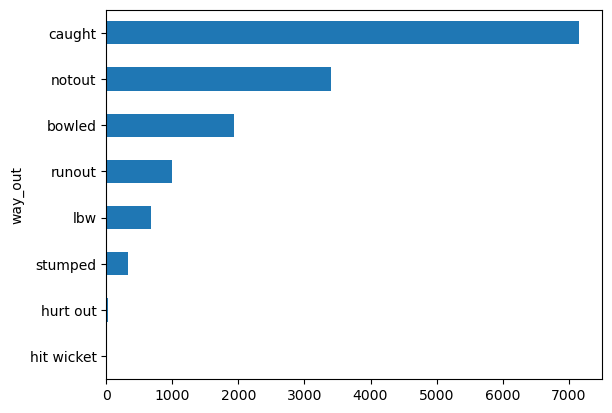

In [65]:
bat_df.groupby('way_out').batter_name.count().sort_values().plot(kind='barh')

In [66]:
for i in bat_df.groupby('way_out'):
    t = i[1].batter_name.value_counts().sort_values(ascending=False)
    print("most number of got outs via "+str(i[0]),"-"\
          ,t.index[0],","\
           ,t.iloc[0],"times.")

most number of got outs via bowled - Shane Watson , 30 times.
most number of got outs via caught - Suresh Raina , 110 times.
most number of got outs via hit wicket - Riyan Parag , 1 times.
most number of got outs via hurt out - Sachin Tendulkar , 2 times.
most number of got outs via lbw - Brendon McCullum , 16 times.
most number of got outs via notout - Ravindra Jadeja , 67 times.
most number of got outs via runout - Gautam Gambhir , 15 times.
most number of got outs via stumped - Suresh Raina , 8 times.


In [67]:
bat_df.batter_name.value_counts()[-480:-449]

Faiz Fazal             11
Ayush Badoni           11
Sachin Baby            11
Christian              11
Akshath Reddy          11
Balachandra Akhil      11
Simon Katich           11
Negi                   11
Kagiso Rabada          11
Rajat Patidar          11
Chaminda Vaas          11
Colin de Grandhomme    11
Colin Ingram           11
Hashim Amla            11
Chris Jordan           11
Dimitri Mascarenhas    11
Nathan Coulter-Nile    10
Tom Curran             10
Yogesh Takawale        10
Nitin Saini            10
Lomror                 10
Mohammed Siraj         10
W Saha                 10
Chawla                 10
Pinal Shah             10
Jitesh Sharma          10
de Grandhomme          10
Pradeep Sangwan        10
Scott Styris           10
Akshdeep Nath          10
Ankit Sharma           10
Name: batter_name, dtype: int64

In [68]:
bat_df[bat_df.batter_name.str.endswith("Billings")]

,season,match,result,team,innings,batter_name,runs,balls,fours,sixes,strike rate,way_out,bowler_out,fielder
980,Indian Premier League 2019,"SUNRISERS HYDERABAD vs CHENNAI SUPER KINGS, 33...",Sunrisers Hyderabad won by 6 wkts,Chennai Super Kings,1st innings,Billings,0,4.0,0.0,0.0,0.00,caught,Khaleel Ahmed,Vijay Shankar
1788,"Indian Premier League, 2016","DELHI CAPITALS vs ROYAL CHALLENGERS BANGALORE,...",Royal Challengers Bangalore won by 6 wkts,Delhi Capitals,1st innings,Sam Billings,4,6.0,0.0,0.0,66.67,caught,C Jordan,Gayle
2211,"Indian Premier League, 2018","CHENNAI SUPER KINGS vs PUNJAB KINGS, 56th Match",Chennai Super Kings won by 5 wkts,Chennai Super Kings,2nd innings,Sam Billings,0,1.0,0.0,0.0,0.00,bowled,Rajpoot,b Rajpoot
2244,"Indian Premier League, 2018","DELHI CAPITALS vs CHENNAI SUPER KINGS, 52nd Match",Delhi Daredevils won by 34 runs,Chennai Super Kings,2nd innings,Sam Billings,1,5.0,0.0,0.0,20.00,caught,A Mishra,Abhishek Sharma
3590,"Indian Premier League, 2017","PUNJAB KINGS vs DELHI CAPITALS, 36th Match",Kings XI Punjab won by 10 wkts,Delhi Capitals,1st innings,Billings,0,2.0,0.0,0.0,0.00,caught,Sandeep Sharma,Saha
3901,"Indian Premier League, 2016","DELHI CAPITALS vs RISING PUNE SUPERGIANT, 33rd...",Rising Pune Supergiants won by 7 wkts,Delhi Capitals,1st innings,Sam Billings,24,15.0,1.0,2.0,160.00,caught,R Bhatia,A Rahane
4009,"Indian Premier League, 2016","DELHI CAPITALS vs KOLKATA KNIGHT RIDERS, 26th ...",Delhi Daredevils won by 27 runs,Delhi Capitals,1st innings,Sam Billings,54,34.0,3.0,2.0,158.82,bowled,Umesh,b Umesh
4048,"Indian Premier League, 2016","PUNJAB KINGS vs DELHI CAPITALS, 36th Match",Kings XI Punjab won by 9 runs,Delhi Capitals,2nd innings,Sam Billings,6,9.0,0.0,0.0,66.67,caught,M Stoinis,W Saha
4118,"Indian Premier League, 2018","RAJASTHAN ROYALS vs CHENNAI SUPER KINGS, 43rd ...",Rajasthan Royals won by 4 wkts,Chennai Super Kings,1st innings,Billings,27,22.0,3.0,0.0,122.73,runout,run out (Jos Buttler),run out (Jos Buttler)
4450,"Indian Premier League, 2018","CHENNAI SUPER KINGS vs MUMBAI INDIANS, 27th Match",Mumbai Indians won by 8 wkts,Chennai Super Kings,1st innings,Billings,3,5.0,0.0,0.0,60.00,caught,Hardik Pandya,Cutting


In [69]:
rep2 = {'J Suchith':'Jagadeesha Suchith','Laughlin':'Ben Laughlin','Plunkett':'Liam Plunkett',\
       'Badree':'Samuel Badree','Rassie van der Dussen':'van der Dussen',\
       'Nortje':'Anrich Nortje',"Josh Philippe":"Philippe",'Tare':'Aditya Tare',\
        'Hardus Viljoen':'Viljoen','Turner':'Ashton Turner','Steyn':'Dale Steyn',\
        'Pretorius':'Dwaine Pretorius','R Bhatia':'Rajat Bhatia','M Theekshana':'Maheesh Theekshana',\
        'I Abdulla':'Iqbal Abdulla','Mathews':'Angelo Mathews','Vijay':'Murali Vijay',\
        'Cariappa':'KC Cariappa','Nehra':'Ashish Nehra','Seifert':'Tim Seifert','Conway':'Devon Conway',\
        'Tahir':'Imran Tahir','Samuels':'Marlon Samuels','K Khaleel Ahmed':'Khaleel Ahmed',\
        'Indrajith':'Baba Indrajith','Jaggi':'Ishank Jaggi','Barinder':'Barinder Sran',\
        'Klaasen':'Heinrich Klaasen','Chakravarthy':'Varun Chakravarthy','P Kumar':'Praveen Kumar',\
        'Nadeem':'Shahbaz Nadeem','Harbhajan':'Harbhajan Singh','Markande':'Mayank Markande',\
        'Milne':'Adam Milne','Hazlewood':'Josh Hazlewood','Santner':'Mitchell Santner',\
        'Varun Chakaravarthy':'Varun Chakravarthy','Chakaravarthy':'Varun Chakravarthy',\
        'K Nagarkoti':'Kamlesh Nagarkoti','Chameera':'Dushmantha Chameera','Duminy':'Jean-Paul Duminy',\
        'Deepak Chahar':'D Chahar','Goswami':'Shreevats Goswami','Mustafizur':'Mustafizur Rahman',\
        'Rajpoot':'Ankit Rajpoot','Johnson':'Mitchell Johnson','Hales':'Alex Hales','Mujeeb':'Mujeeb Ur Rahman',\
        'Aravind':'Sreenath Aravind','Udana':'Isuru Udana','Thakur':'Shardul Thakur','SN Thakur':'Shardul Thakur',\
        'Prabhudessai':'Suyash Prabhudessai','Aaron':'Varun Aaron','Ishant':'Ishant Sharma',\
        'A Mishra':'Amit Mishra','Neesham':'James Neesham','Jamieson':'Kyle Jamieson','Jackson':'Sheldon Jackson',\
        'C Woakes':'Chris Woakes','Ingram':'Colin Ingram','D Kulkarni':'Dhawal Kulkarni','L Simmons':'Lendl Simmons',\
        'M Pandey':'Manish Pandey','Prasidh':'Prasidh Krishna','Amla':'Hashim Amla','Faulkner':'James Faulkner',\
        'Sangwan':'Pradeep Sangwan','Markram':'Aiden Markram','S Kaul':'Siddarth Kaul','Chahal':'Yuzvendra Chahal',\
        'Head':'Travis Head','Munro':'Colin Munro','Wade':'Matthew Wade','B Rajapaksa':'Bhanuka Rajapaksa',\
        'W Hasaranga':'Wanindu Hasaranga','C Brathwaite':'Carlos Brathwaite','M Ashwin':'Murugan Ashwin',\
        'Markande':'Mayank Markande','CJ Anderson':'Corey Anderson','Guptill':'Martin Guptill','Binny':'Stuart Binny',\
        'Vohra':'Manan Vohra','Rahane':'Ajinkya Rahane','A Rahane':'Ajinkya Rahane','Holder':'Jason Holder',\
        'Cutting':'Ben Cutting','Gambhir':'Gautam Gambhir','Southee':'Tim Southee','Shami':'Mohammed Shami',\
        'Henriques':'Moises Henriques','Nabi':'Mohammad Nabi','Gowtham':'Krishnappa Gowtham','Coulter-Nile':'Nathan Coulter-Nile',\
        'Bumrah':'Jasprit Bumrah','Roy':'Jason Roy','McClenaghan':'Mitchell McClenaghan','Unadkat':'Jaydev Unadkat',\
        'Siraj':'Mohammed Siraj','Billings':'Sam Billings',
       }

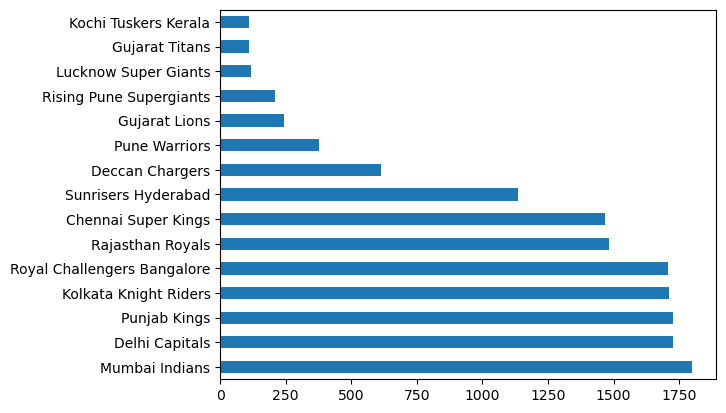

In [70]:
bat_df.team.value_counts().plot(kind='barh');

In [80]:
bat_df[(bat_df.batter_name=="Rahul") | (bat_df.batter_name=="KL Rahul")].team.value_counts()

Punjab Kings                   39
Sunrisers Hyderabad            16
Lucknow Super Giants           15
Royal Challengers Bangalore    14
Chennai Super Kings             0
Deccan Chargers                 0
Delhi Capitals                  0
Gujarat Lions                   0
Gujarat Titans                  0
Kochi Tuskers Kerala            0
Kolkata Knight Riders           0
Mumbai Indians                  0
Pune Warriors                   0
Rajasthan Royals                0
Rising Pune Supergiants         0
Name: team, dtype: int64

In [81]:
bat_df[bat_df.team == 'Lucknow Super Giants']

,season,match,result,team,innings,batter_name,runs,balls,fours,sixes,strike rate,way_out,bowler_out,fielder
4634,Indian Premier League 2022,LUCKNOW SUPER GIANTS vs ROYAL CHALLENGERS BANG...,Royal Challengers Bangalore won by 14 runs,Lucknow Super Giants,2nd innings,Quinton de Kock,6,5.0,0.0,1.0,120.00,caught,Siraj,du Plessis
4635,Indian Premier League 2022,LUCKNOW SUPER GIANTS vs ROYAL CHALLENGERS BANG...,Royal Challengers Bangalore won by 14 runs,Lucknow Super Giants,2nd innings,KL Rahul,79,58.0,3.0,5.0,136.21,caught,Hazlewood,Shahbaz Ahmed
4637,Indian Premier League 2022,LUCKNOW SUPER GIANTS vs ROYAL CHALLENGERS BANG...,Royal Challengers Bangalore won by 14 runs,Lucknow Super Giants,2nd innings,Manan Vohra,19,11.0,1.0,2.0,172.73,caught,Hazlewood,Shahbaz Ahmed
4638,Indian Premier League 2022,LUCKNOW SUPER GIANTS vs ROYAL CHALLENGERS BANG...,Royal Challengers Bangalore won by 14 runs,Lucknow Super Giants,2nd innings,Deepak Hooda,45,26.0,1.0,4.0,173.08,bowled,W Hasaranga,b W Hasaranga
4639,Indian Premier League 2022,LUCKNOW SUPER GIANTS vs ROYAL CHALLENGERS BANG...,Royal Challengers Bangalore won by 14 runs,Lucknow Super Giants,2nd innings,Marcus Stoinis,9,9.0,0.0,1.0,100.00,caught,Harshal Patel,Rajat Patidar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,Indian Premier League 2022,"GUJARAT TITANS vs LUCKNOW SUPER GIANTS, 4th Match",Gujarat Titans won by 5 wkts,Lucknow Super Giants,1st innings,Manish Pandey,6,5.0,1.0,0.0,120.00,bowled,Shami,b Shami
9203,Indian Premier League 2022,"GUJARAT TITANS vs LUCKNOW SUPER GIANTS, 4th Match",Gujarat Titans won by 5 wkts,Lucknow Super Giants,1st innings,Deepak Hooda,55,41.0,6.0,2.0,134.15,lbw,Rashid Khan,lbw b Rashid Khan
9204,Indian Premier League 2022,"GUJARAT TITANS vs LUCKNOW SUPER GIANTS, 4th Match",Gujarat Titans won by 5 wkts,Lucknow Super Giants,1st innings,Ayush Badoni,54,41.0,4.0,3.0,131.71,caught,Aaron,Hardik Pandya
9205,Indian Premier League 2022,"GUJARAT TITANS vs LUCKNOW SUPER GIANTS, 4th Match",Gujarat Titans won by 5 wkts,Lucknow Super Giants,1st innings,Krunal Pandya,21,13.0,3.0,0.0,161.54,notout,not out,not out


In [73]:
bat_df.result.apply(lambda x:x.split('won')[0].strip()).value_counts()

Mumbai Indians                                       2019
Chennai Super Kings                                  1852
Kolkata Knight Riders                                1697
Royal Challengers Bangalore                          1582
Rajasthan Royals                                     1438
Kings XI Punjab                                      1319
Sunrisers Hyderabad                                  1124
Delhi Daredevils                                     1002
Delhi Capitals                                        525
Deccan Chargers                                       473
Punjab Kings                                          204
Pune Warriors                                         192
Gujarat Titans                                        188
Gujarat Lions                                         186
Rising Pune Supergiant                                167
Lucknow Super Giants                                  143
Kochi Tuskers Kerala                                   82
Rising Pune Su